# Data Science with Python:  Geospatial Data

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/28494828118/in/dateposted-public/" title="DGGS / Global Matrix"><img src="https://farm2.staticflickr.com/1741/28494828118_573fc6c57b.jpg" width="500" height="281" alt="DGGS / Global Matrix"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

DGGS is a different strategy for displaying global data.  You may soon be able to order up a specific hexagon of data, from anywhere around the globe, using Python.

References:

   1. Kevin Sahr, Denis White & A. Jon Kimerling (2013) Geodesic Discrete Global Grid Systems, Cartography and Geographic Information Science, 30:2, 121-134, DOI: [10.1559/152304003100011090](https://www.tandfonline.com/doi/abs/10.1559/152304003100011090)

   2. [Hexagrid on Unity Game System](https://youtu.be/JWl4ZPrb5Ag)
   
   3. [Me on edu-sig](https://mail.python.org/pipermail/edu-sig/2018-May/011863.html)


#### Housekeeping:

Getting ```basemap``` installed may take some doing.  I had the most luck with my ```geopandas``` Anaconda environment, but even then I got some warnings.  Many more than we see below.

Getting everything from the ```conda-forge``` repo seemed the best strategy for me:

<img src="conda-forge-basemap-ok.jpg" width="400">

---

I'm only going to give one example of data visualization using basemap, using our favorite ```airports.csv```.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


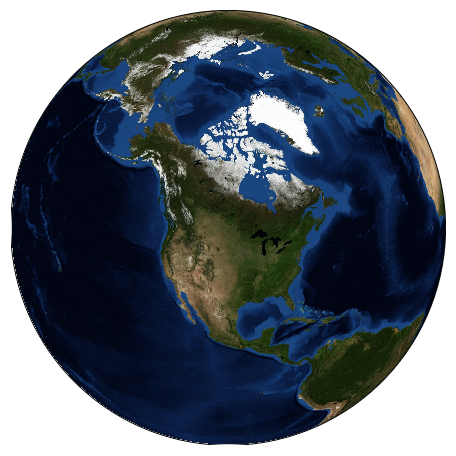

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In order to suppress a long warning owing to changes in the ```matplotlib``` API, I had to edit the ```__init__``` file for basemap a little.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/41696411404/in/dateposted-public/" title="Patching __init__ manually"><img src="https://farm1.staticflickr.com/889/41696411404_66f8aa6a68.jpg" width="500" height="352" alt="Patching __init__ manually"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

OK, lets keep going.  I'm drawing from Chapter 4 of Vanderplas.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


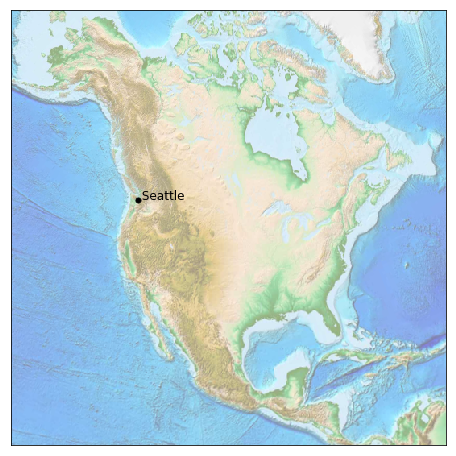

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [4]:
from  itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

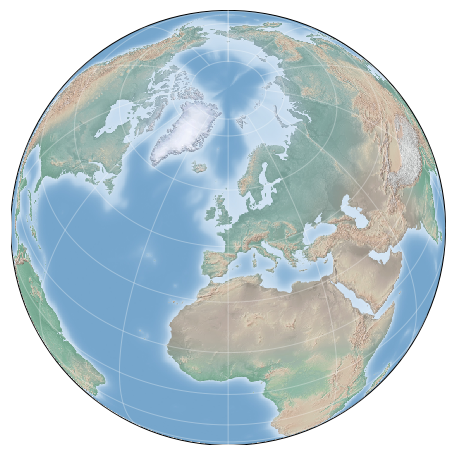

In [5]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

In [6]:
airports = pd.read_csv('airports.csv')

In [7]:
airports.head()

,Unnamed: 0,iata,iso,name,continent,type,lat,lon,size,status
0,0,UTK,MH,Utirik Airport,OC,airport,11.233333,169.86667,small,1
1,1,FIV,US,Five Finger CG Heliport,NaN,heliport,NaN,NaN,NaN,1
2,2,FAK,US,False Island Seaplane Base,NaN,seaplanes,NaN,NaN,NaN,1
3,3,BWS,US,Blaine Municipal Airport,NaN,closed,NaN,NaN,NaN,0
4,4,WKK,US,Aleknagik / New Airport,NaN,airport,59.277780,-158.61111,medium,1


In [8]:
airports.dtypes

Unnamed: 0      int64
iata           object
iso            object
name           object
continent      object
type           object
lat           float64
lon           float64
size           object
status          int64
dtype: object

In [9]:
airports = airports[airports.lat.notna() & airports.lon.notna()]

In [10]:
airports.head()

,Unnamed: 0,iata,iso,name,continent,type,lat,lon,size,status
0,0,UTK,MH,Utirik Airport,OC,airport,11.233333,169.86667,small,1
4,4,WKK,US,Aleknagik / New Airport,NaN,airport,59.277780,-158.61111,medium,1
6,6,FOB,US,Fort Bragg Airport,NaN,airport,39.474445,-123.79444,small,1
7,7,ABP,PG,Atkamba Airport,OC,airport,-6.066667,141.10000,small,1
9,9,ADC,PG,Andakombe Airport,OC,airport,-7.133333,145.73334,small,1


In [11]:
us_large_airports = airports[(airports.iso == 'US') & (airports.loc[:,'size'] == 'large')]
world_large_airports = airports[(airports.loc[:,'size'] == 'large')]

In [12]:
us_large_airports.head()

,Unnamed: 0,iata,iso,name,continent,type,lat,lon,size,status
2176,2176,ABQ,US,Albuquerque International Sunport Airport,NaN,airport,35.049625,-106.617195,large,1
2188,2188,ADW,US,Andrews Air Force Base,NaN,airport,38.816666,-76.866670,large,1
2196,2196,AFW,US,Fort Worth Alliance Airport,NaN,airport,32.986668,-97.316666,large,1
2199,2199,AGS,US,Augusta Regional At Bush Field,NaN,airport,33.373665,-81.973434,large,1
2220,2220,AMA,US,Rick Husband Amarillo International Airport,NaN,airport,35.218273,-101.705130,large,1


### LAB:  PICK AN AIRPORT

The example below shows us picking "SEA" is our aiport of interest.  Notice how we're extracting three values from the row.  The same syntax in the code cell immediately after the one below may be fine tuned the the same way.

In [13]:
def get_airport(code):
    row_data = us_large_airports[us_large_airports.iata == code]
    return row_data.loc[:,["lon", "lat", "iata"]].values

get_airport("SEA")

array([[-122.30173500000001, 47.44384, 'SEA']], dtype=object)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


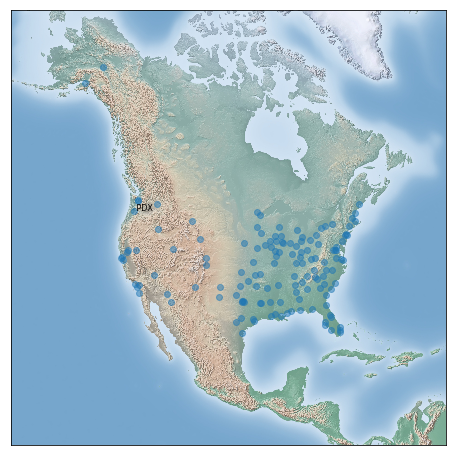

In [14]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

lat = us_large_airports.lat.values
lon = us_large_airports.lon.values
codes = us_large_airports.iata.values

m.shadedrelief()

m.scatter(lon, lat, latlon=True, alpha=0.5)

a_lon, a_lat, code = get_airport("PDX")[0]

x, y = m(a_lon, a_lat)
_ = plt.text(x, y, " "+code, fontsize=8)

In [15]:
a_lon, a_lat, code = get_airport("PDX")[0]
print(a_lon, a_lat, code)

-122.5929 45.588997 PDX


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


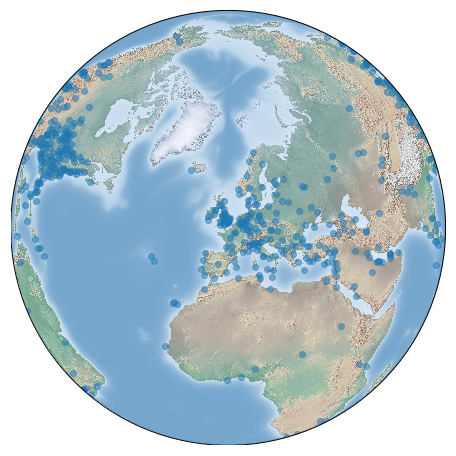

In [16]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)

lat = world_large_airports.lat.values
lon = world_large_airports.lon.values

m.shadedrelief()

_ = m.scatter(lon, lat, latlon=True, alpha=0.5)
